<a href="https://colab.research.google.com/github/Suvashini-Padmanabhan/investment-and-finacial-analysis/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install bokeh

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("/content/drive/MyDrive/archive (1)/data.csv")
zdf=pd.read_csv("/content/drive/MyDrive/archive (1)/zonal-data.csv")
cc=pd.read_csv("/content/drive/MyDrive/archive (1)/country code.csv",encoding = "ISO-8859-1")

In [6]:
df.head()

,Zone,NameOfEnterprise,InvestingCountry,Products
0,Adamjee,A.M.C.S Textiles Limited,UNITED KINGDOM,Garments
1,Adamjee,Checkpoint Systems Bangladesh Ltd.,CANADA,Garment Accessories
2,Adamjee,Epic Garments Mfg. Co. Ltd,HONGKONG,Garments
3,Adamjee,Erum Bangladesh Limited,SPAIN,Garment Accessories
4,Adamjee,French Fashion Knitting Pvt. Ltd.,HONGKONG,Garments


In [7]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Zone,8
NameOfEnterprise,502
InvestingCountry,34
Products,25


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Zone,503,8,Chattogram,155
NameOfEnterprise,503,502,Xin Chang Shoes (BD) Limited,2
InvestingCountry,503,34,BANGLADESH,163
Products,502,24,Garments,155


In [9]:
zdf.head()

,Zone,Land,SFB,TotalInvestment,ExportEarned,NewJobOpportunity
0,Chattogram,2.5,2.75,6.87,545.28,935
1,Dhaka,2.5,2.75,16.07,394.46,1773
2,Cumilla,2.5,2.75,48.83,136.39,1808
3,Adamjee,2.5,2.75,3.51,177.17,0
4,Karnaphuli,2.5,2.75,2.53,231.39,648


In [10]:
zdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Land,8.0,2.08750,0.569304,1.40,1.400,2.50,2.5000,2.50
SFB,8.0,2.31875,0.595182,1.60,1.600,2.75,2.7500,2.75
TotalInvestment,8.0,10.13125,16.444780,0.36,1.850,3.02,9.1700,48.83
ExportEarned,8.0,197.45125,188.175461,19.52,40.875,156.78,272.1575,545.28
NewJobOpportunity,8.0,817.00000,665.295853,0.00,482.000,624.00,1144.5000,1808.00


In [11]:
print ("Total investment in July-September, 2020",zdf['TotalInvestment'].sum(),"M USD")
print ("Total Export earned in July-September, 2020",zdf['ExportEarned'].sum(),"M USD")
print ("Total New Job Opportunity created in July-September, 2020",zdf['NewJobOpportunity'].sum(),"person")

Total investment in July-September, 2020 81.05 M USD
Total Export earned in July-September, 2020 1579.61 M USD
Total New Job Opportunity created in July-September, 2020 6536 person


In [12]:
df.isna().sum()

,0
Zone,0
NameOfEnterprise,0
InvestingCountry,0
Products,1


In [13]:
df['Products']=df['Products'].fillna("Garments")
df.isna().sum()

,0
Zone,0
NameOfEnterprise,0
InvestingCountry,0
Products,0


In [14]:
zdf.isna().sum()

,0
Zone,0
Land,0
SFB,0
TotalInvestment,0
ExportEarned,0
NewJobOpportunity,0


In [15]:
stat, p = stats.normaltest(zdf['TotalInvestment'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=16.24293, p=0.000
Sample does not look Gaussian


Text(0.5, 1.0, '\nHistogram of Total Investment per zone in July-September, 2020 \n')

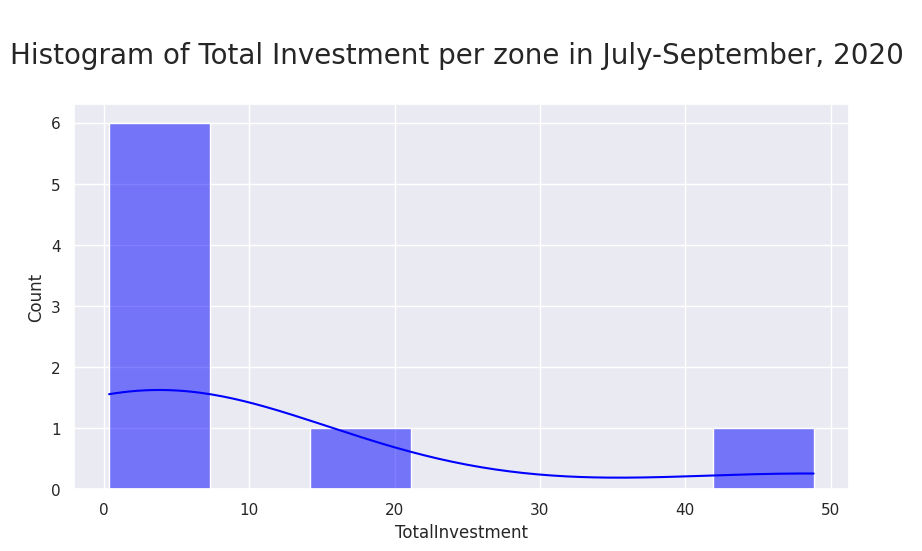

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.histplot(zdf["TotalInvestment"],color='blue',stat='count',kde=True,legend=True)
p.axes.set_title("\nHistogram of Total Investment per zone in July-September, 2020 \n",fontsize=20)

In [17]:
stat, p = stats.normaltest(zdf['ExportEarned'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=1.94226, p=0.379
Sample looks Gaussian


Text(0.5, 1.0, '\nHistogram of Total Export Earned per zone in July-September, 2020 \n')

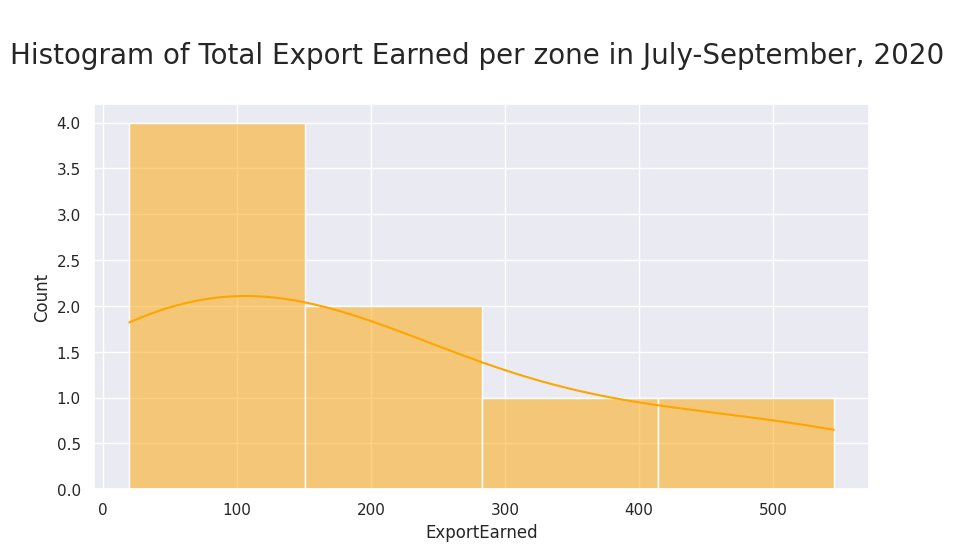

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.histplot(zdf['ExportEarned'],color='orange',stat='count',kde=True,legend=True)
p.axes.set_title("\nHistogram of Total Export Earned per zone in July-September, 2020 \n",fontsize=20)

In [20]:
result = stats.anderson(zdf['ExportEarned'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal')

Statistic: 0.412
Significance level 15.00 % : critical value 0.519, data looks normal
Significance level 10.00 % : critical value 0.591, data looks normal
Significance level 5.00 % : critical value 0.709, data looks normal
Significance level 2.50 % : critical value 0.827, data looks normal
Significance level 1.00 % : critical value 0.984, data looks normal


In [21]:
result = stats.anderson(zdf['TotalInvestment'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal')

Statistic: 1.260
Significance level 15.00 % : critical value 0.519, data does not look normal
Significance level 10.00 % : critical value 0.591, data does not look normal
Significance level 5.00 % : critical value 0.709, data does not look normal
Significance level 2.50 % : critical value 0.827, data does not look normal
Significance level 1.00 % : critical value 0.984, data does not look normal


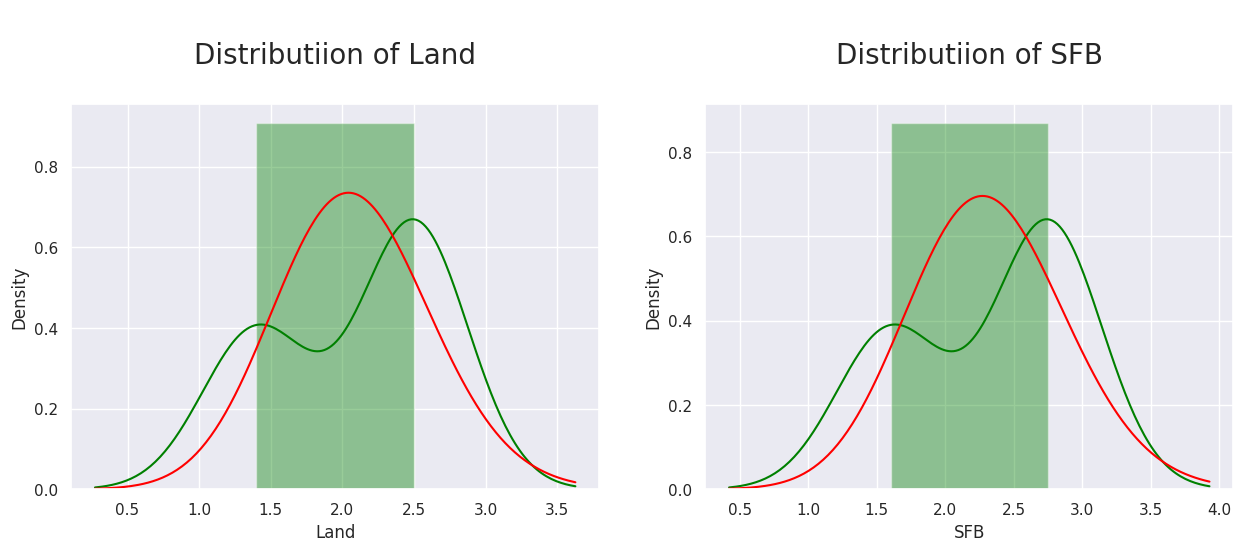

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
for i, column in enumerate(["Land", "SFB"], 1):
    plt.subplot(1,2,i)
    p=sns.distplot(zdf[column],color='green',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
    p.axes.set_title("\nDistributiion of "+column+"\n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of Total Investment per zone in July-September, 2020 \n')

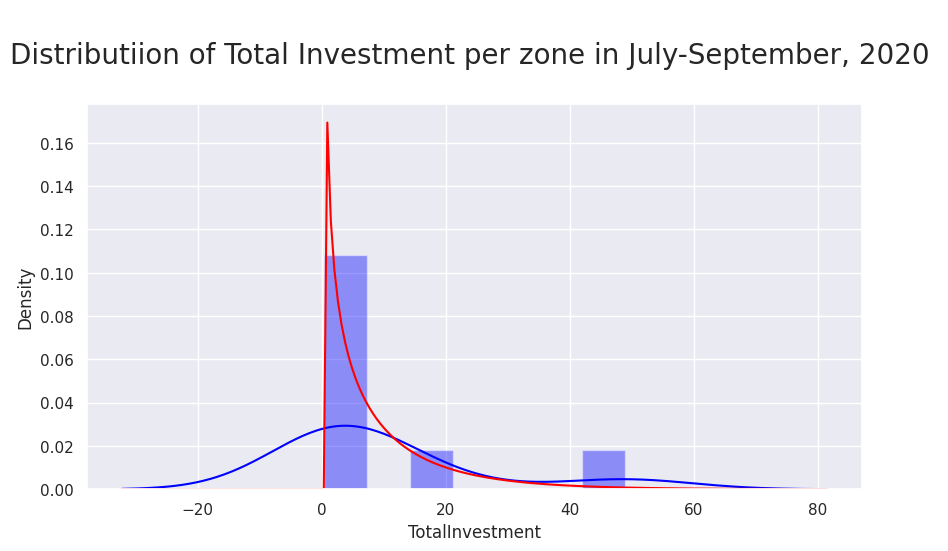

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(zdf["TotalInvestment"],color='blue',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistributiion of Total Investment per zone in July-September, 2020 \n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of Export Earned in July-September, 2020\n')

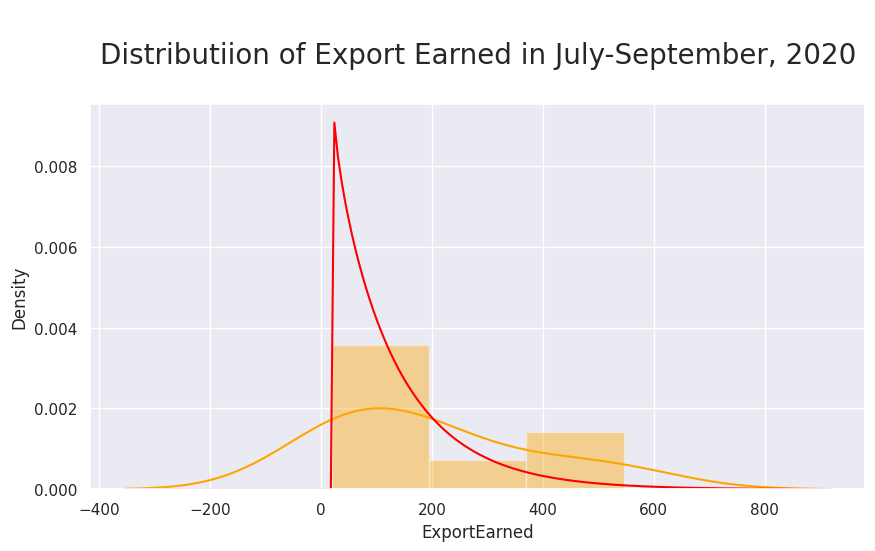

In [24]:
p=sns.distplot(zdf["ExportEarned"],color='orange',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\nDistributiion of Export Earned in July-September, 2020\n",fontsize=20)

Text(0.5, 1.0, '\nDistributiion of New Job Opportunity created in July-September, 2020\n')

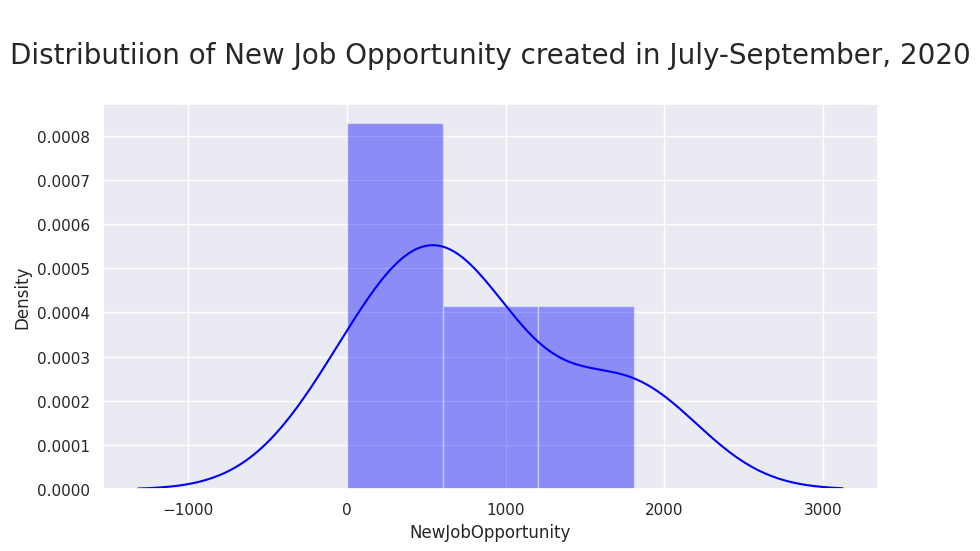

In [25]:
p=sns.distplot(zdf["NewJobOpportunity"],color='blue')
p.axes.set_title("\nDistributiion of New Job Opportunity created in July-September, 2020\n",fontsize=20)

Text(0.5, 1.0, '\nNumber of Enterprizes per zone\n')

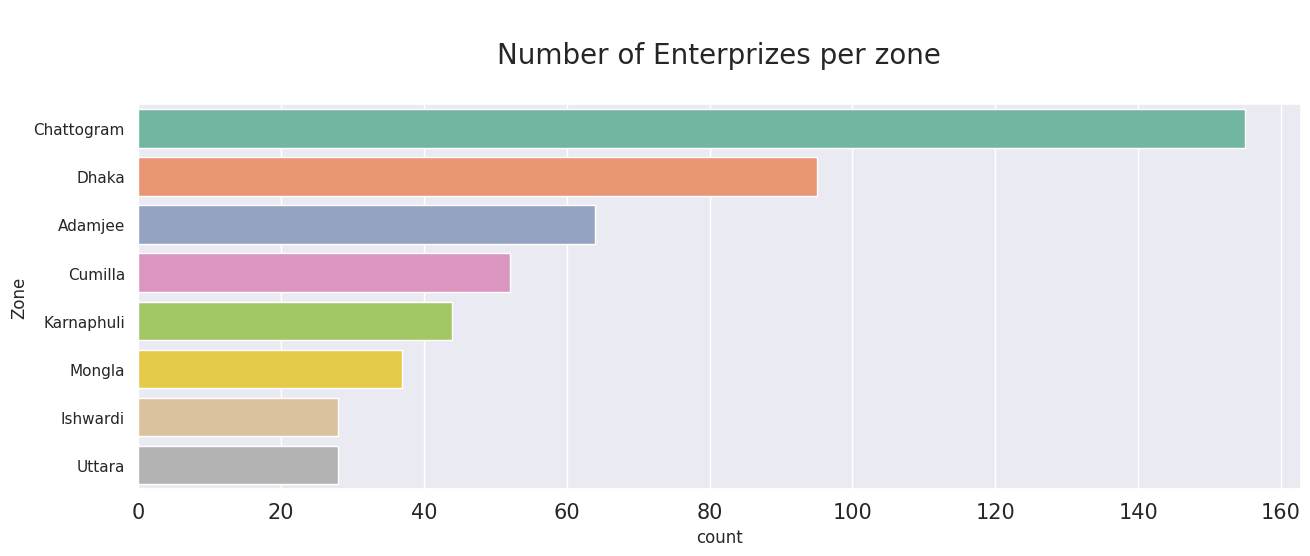

In [26]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Zone'],palette="Set2",hue_order=df.groupby('Zone'),order=df.Zone.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per zone\n",fontsize=20)

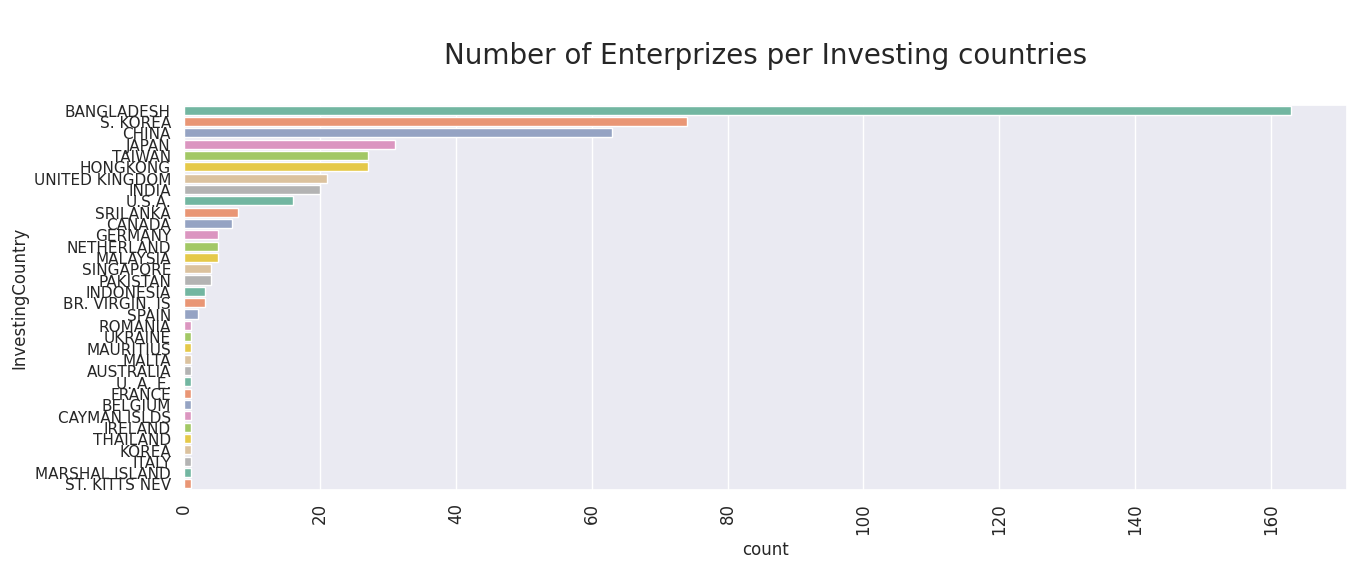

In [27]:
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['InvestingCountry'],palette="Set2",hue_order=df.groupby('InvestingCountry'),order=df.InvestingCountry.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per Investing countries\n",fontsize=20);

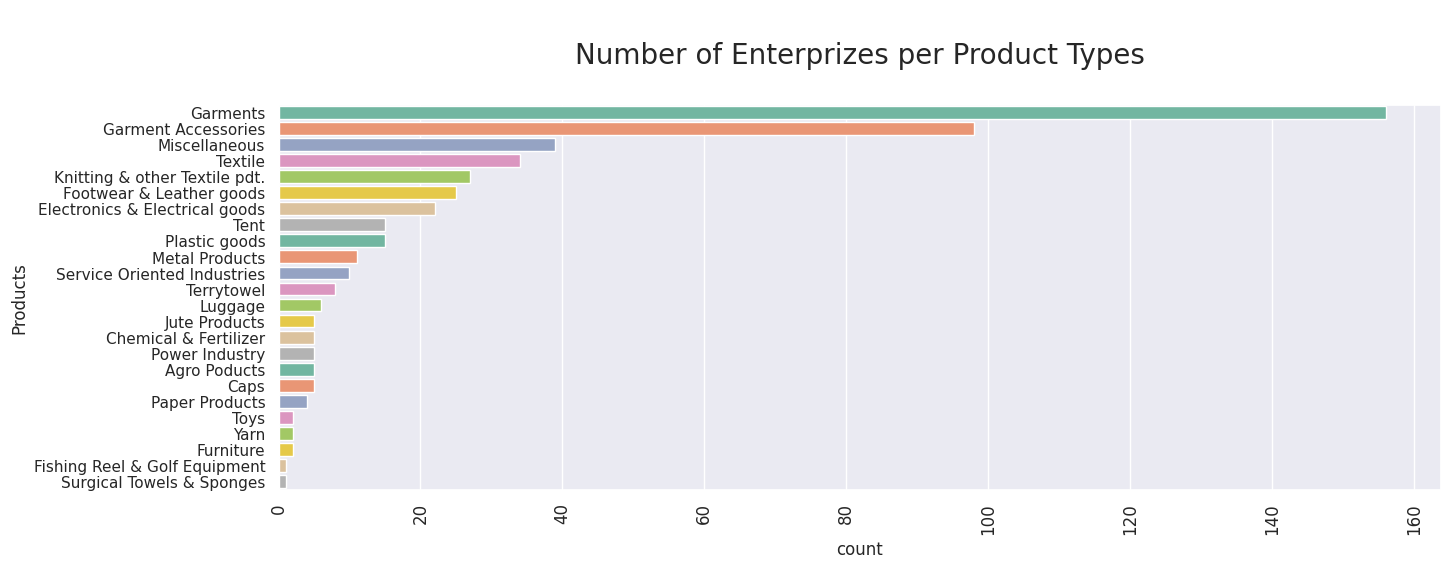

In [28]:
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['Products'],palette="Set2",hue_order=df.groupby('Products'),order=df.Products.value_counts().sort_values(ascending=False).index)
p.axes.set_title("\nNumber of Enterprizes per Product Types\n",fontsize=20);

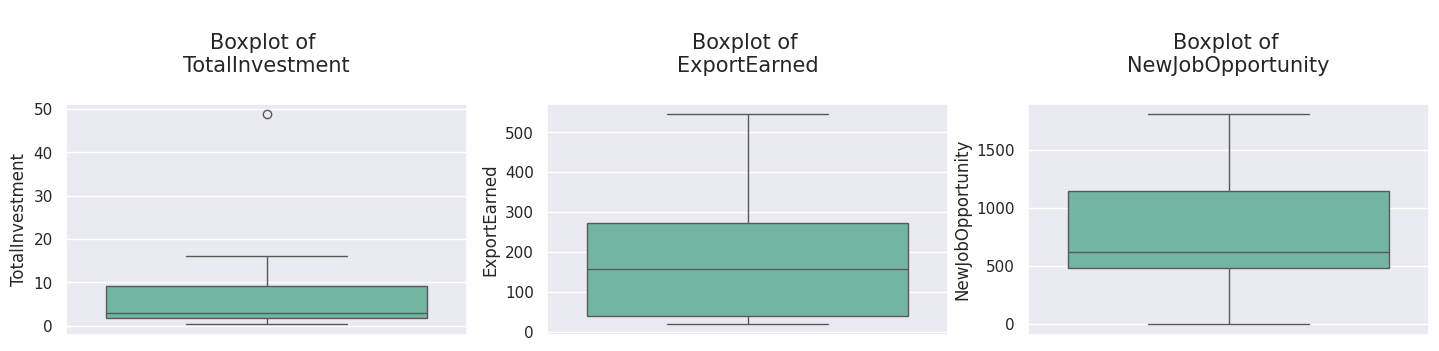

In [29]:
sns.set(rc={'figure.figsize':(30,3)})
for i, column in enumerate(["TotalInvestment", "ExportEarned", "NewJobOpportunity"], 1):
    plt.subplot(1,5,i)
    p= sns.boxplot(zdf[column],palette="Set2");
    p.axes.set_title("\nBoxplot of \n"+column+"\n",fontsize=15)

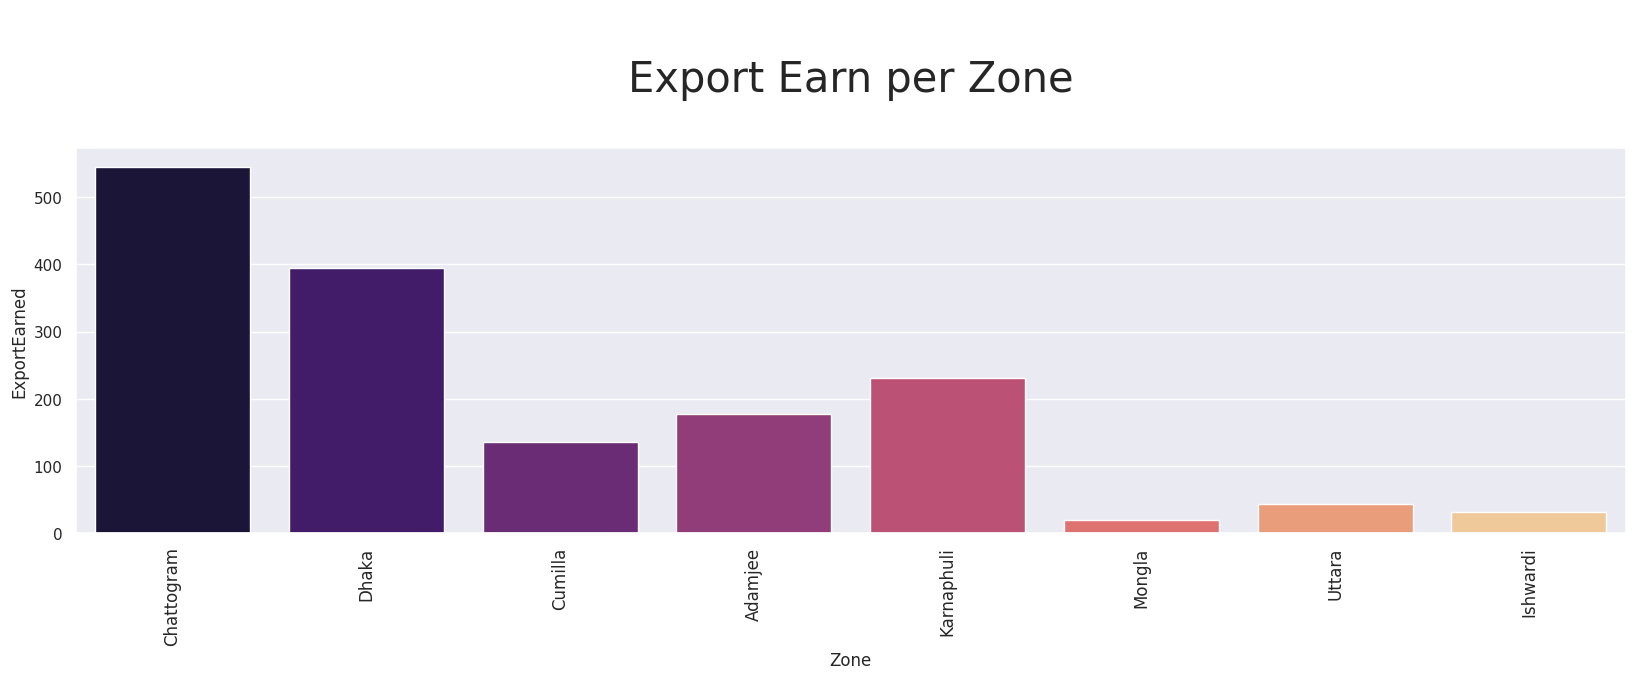

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="Zone", y="ExportEarned", data=zdf,palette="magma",capsize=.2)
p.axes.set_title("\nExport Earn per Zone\n",fontsize=30);

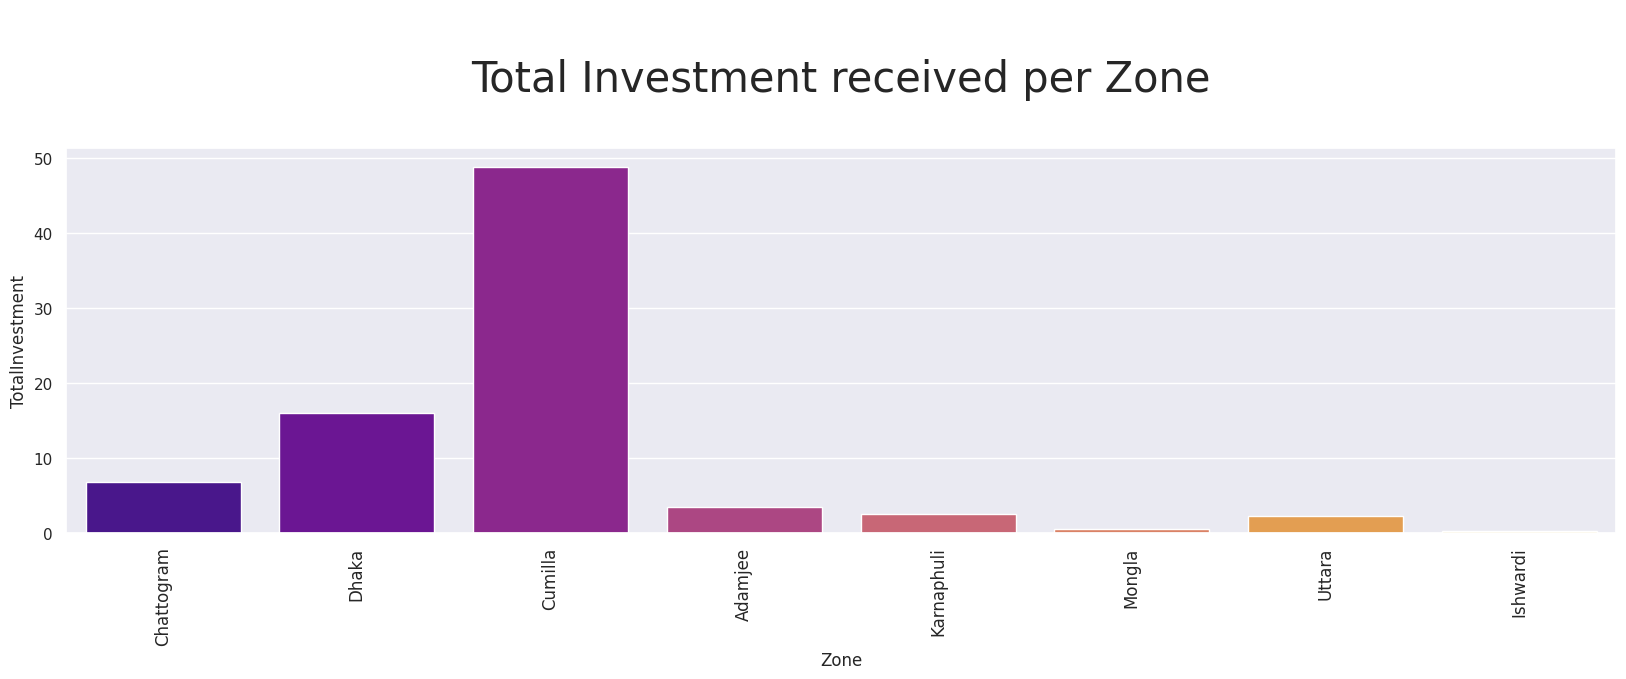

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="Zone", y="TotalInvestment", data=zdf,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Investment received per Zone\n",fontsize=30);

In [32]:
export = df.Zone.value_counts().to_frame('CountOfEnterprize').reset_index()
export.rename(columns = {'index':'Zone'}, inplace = True)
export=pd.DataFrame.merge(export,zdf,on='Zone')
export=export.drop(["SFB","Land","NewJobOpportunity"],axis=1)
ex=export.copy()
ex.rename(index={0: 'Chattogram',1:'Dhaka',2:'Adamjee',3:'Cumilla',4:'Karnaphuli',5:'Mongla',6:'Ishwardi',7:'Uttara',}, inplace=True)
ex=ex.drop(["Zone"],axis=1)

Text(0.5, 0.98, '\nVariables and co-relation\n')

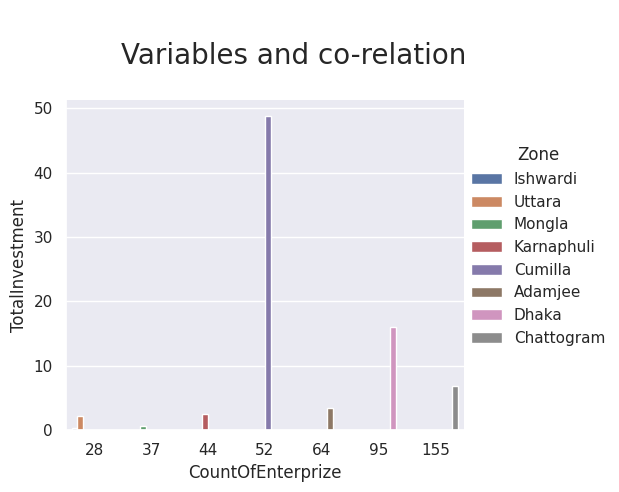

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
g = sns.catplot(x="CountOfEnterprize", y="TotalInvestment",
                hue="Zone",
                data=export, kind="bar");
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('\nVariables and co-relation\n',fontsize=20)

In [34]:
ex.corr()

,CountOfEnterprize,TotalInvestment,ExportEarned
CountOfEnterprize,1.000000,0.093770,0.949863
TotalInvestment,0.093770,1.000000,0.095643
ExportEarned,0.949863,0.095643,1.000000


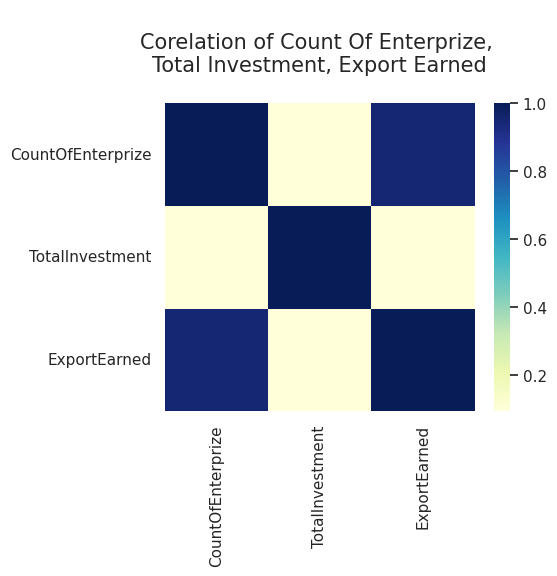

In [35]:
corr=ex.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \nTotal Investment, Export Earned\n",fontsize=15);


In [36]:
price = df.Zone.value_counts().to_frame('CountOfEnterprize').reset_index()
price.rename(columns = {'index':'Zone'}, inplace = True)
price=pd.DataFrame.merge(price,zdf,on='Zone')
price.rename(index={0: 'Chattogram',1:'Dhaka',2:'Adamjee',3:'Cumilla',4:'Karnaphuli',5:'Mongla',6:'Ishwardi',7:'Uttara',}, inplace=True)
price=price.drop(["Zone","TotalInvestment","ExportEarned","NewJobOpportunity"],axis=1)

In [37]:
price.corr()

,CountOfEnterprize,Land,SFB
CountOfEnterprize,1.000000,0.610221,0.610221
Land,0.610221,1.000000,1.000000
SFB,0.610221,1.000000,1.000000


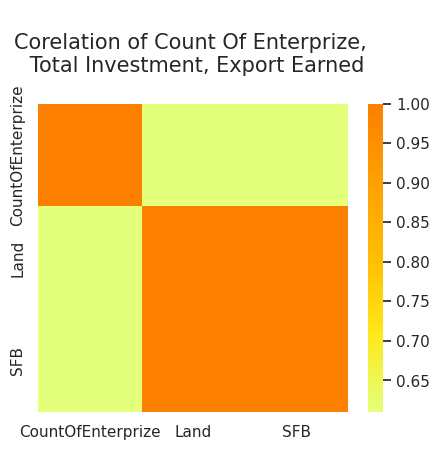

In [38]:
corr=price.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Wistia")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \n Total Investment, Export Earned\n",fontsize=15)

In [39]:
stat, p = stats.kruskal(ex['ExportEarned'], ex['TotalInvestment'], ex['CountOfEnterprize'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

for alpha in [0.001,0.05,0.01,0.03,0.05,0.1,0.2,0.5]:
    if p > alpha:
        print("Alpha:",alpha,' -- Same distributions')
    else:
        print("Alpha:",alpha,' -- Different distributions')

Statistics=13.101, p=0.001
Alpha: 0.001  -- Same distributions
Alpha: 0.05  -- Different distributions
Alpha: 0.01  -- Different distributions
Alpha: 0.03  -- Different distributions
Alpha: 0.05  -- Different distributions
Alpha: 0.1  -- Different distributions
Alpha: 0.2  -- Different distributions
Alpha: 0.5  -- Different distributions
